In [1]:
from BSP import BSPGenerator
from utils import plot_dungeon

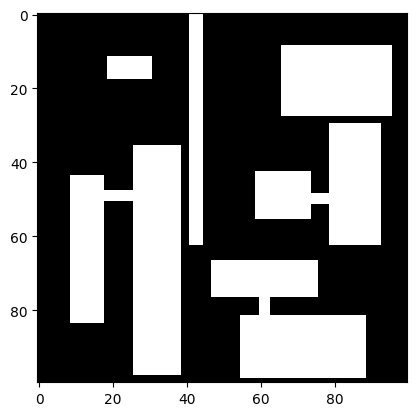

In [2]:
# Example usage
w, h = 100, 100

bspg = BSPGenerator(w, h)
dungeon = bspg.generate_dungeon()

plot_dungeon(dungeon)

In [4]:
for node in bspg.nodes:
    print(node.h, node.w)

100 100
28 100
72 100
30 100
42 100
18 100
24 100
